<a href="https://colab.research.google.com/github/unachankz/goto_data_science/blob/master/notebook/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86%E3%81%AE%E5%8B%89%E5%BC%B7object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
#https://axa.biopapyrus.jp/ia/opencv/object-detection.html

import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# load image, change color spaces, and smoothing
img_tulip = cv2.imread('./tulip.jpeg')
img=img_tulip.copy()
print(img[0,0,0])
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_HSV = cv2.GaussianBlur(img_HSV, (9, 9), 3)

# detect tulips
img_H, img_S, img_V = cv2.split(img_HSV)
_thre, img_flowers = cv2.threshold(img_H, 140, 255, cv2.THRESH_BINARY)
cv2.imwrite('tulips_mask.jpg', img_flowers)

# find tulips
nlabels, labels = cv2.connectedComponents(img_flowers)


img = np.zeros(img.shape[0:3])
height, width = img.shape[0:2]
cols = []

# background is label=0, objects are started from 1
for i in range(1, nlabels):
    cols.append(np.array([random.randint(0, 255),random.randint(0, 255),random.randint(0, 255)]))
segmentation_images=np.zeros([nlabels,750, 1000, 3])
print(segmentation_images.shape)
for i in range(1, nlabels):
    segmentation_images[i,labels == i, ] = img_tulip[labels == i, ]
    img[labels == i, ] = cols[i - 1]

img=img.astype(np.uint8)
segmentation_images=segmentation_images.astype(np.uint8)

12
(40, 750, 1000, 3)


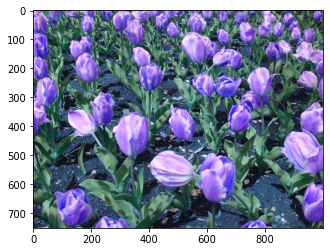

In [77]:
plt.imshow(img_tulip)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


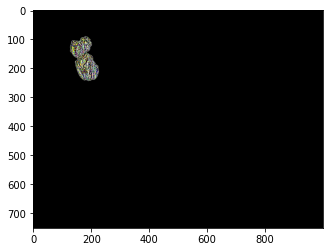

In [84]:
plt.imshow(cv2.Laplacian(segmentation_images[20],cv2.CV_64F))